In [1]:
cd ..

/home/jovyan/work/dsi-plus-2/Capstone


In [2]:
%run __init__.py
%matplotlib inline

In [3]:
stock_data = pd.read_csv("data/sandp500/individual_stocks_5yr/ABBV_data.csv")
stock_data["Date"] = pd.to_datetime(stock_data["Date"])
stock_data = stock_data.set_index("Date")
stock_data.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2012-12-10,37.00,37.00,34.91,35.00,749378,ABBV
2012-12-11,35.05,35.69,34.95,35.32,1472086,ABBV
2012-12-12,35.25,35.25,33.09,33.36,2530442,ABBV
2012-12-13,33.50,34.24,32.61,33.80,4253303,ABBV
2012-12-14,33.90,34.08,32.65,33.00,4006673,ABBV


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1177 entries, 2012-12-10 to 2017-08-11
Data columns (total 6 columns):
Open      1176 non-null float64
High      1176 non-null float64
Low       1177 non-null float64
Close     1177 non-null float64
Volume    1177 non-null int64
Name      1177 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 64.4+ KB


In [5]:
close = stock_data["Close"].values

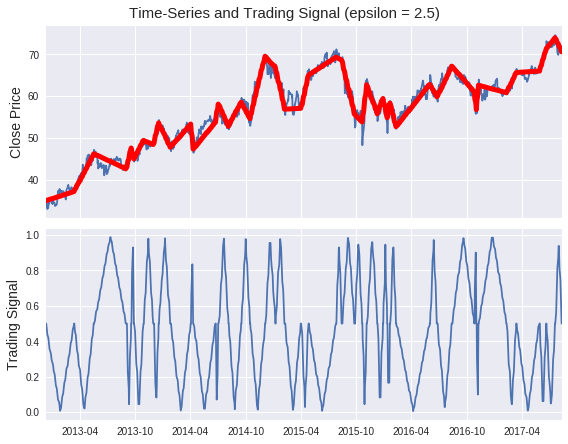

In [6]:
EPSILON = best_epsilon(close)

fig, (ax1, ax2) = plt.subplots(nrows = 2, sharex = True, figsize = (8, 6))
fig.suptitle("Time-Series and Trading Signal "+"(epsilon = "+str(EPSILON)+")", y = 1.02, size = 15)
xx = np.arange(len(close))
stock_data["Close"].plot(ax = ax1 )
ax1.set_ylabel("Close Price", size = 14)

my_label = "PLR (threshold "+str(EPSILON)+")"
piece, lines, points = PLR(close, EPSILON)
ax1.plot(stock_data.index, piece, c = "red", linewidth = 5, label = my_label)

ts = trading_signal(close, EPSILON)
ax2.plot(stock_data.index, ts)
ax2.set_ylabel("Trading Signal", size = 14)

plt.tight_layout()
plt.show()

In [7]:
epsilon_values = list(np.logspace(-3, 0, 4))
epsilon_values.extend([.5*x for x in range(3,11)])
epsilon_values

[0.001, 0.01, 0.10000000000000001, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [8]:
best_epsilon(close, True)

([2.5,
  3.0,
  3.5,
  4.0,
  4.5,
  5.0,
  5.5,
  6.0,
  6.5,
  7.0,
  7.5,
  8.0,
  8.5,
  9.0,
  9.5,
  10.0,
  10.5,
  11.0,
  11.5,
  12.0,
  12.5,
  13.0,
  13.5,
  14.0,
  14.5,
  15.0,
  15.5,
  16.0,
  16.5,
  17.0,
  17.5,
  18.0,
  18.5,
  19.0],
 [176.85000000000005,
  176.46000000000001,
  142.87000000000003,
  125.03,
  109.03999999999999,
  109.03999999999999,
  95.5,
  91.900000000000006,
  81.5,
  102.61999999999998,
  102.61999999999998,
  86.679999999999993,
  86.679999999999993,
  78.75,
  78.75,
  78.75,
  78.75,
  78.75,
  66.309999999999988,
  66.309999999999988,
  51.36999999999999,
  51.36999999999999,
  51.36999999999999,
  51.36999999999999,
  51.36999999999999,
  51.36999999999999,
  51.36999999999999,
  51.36999999999999,
  36.689999999999998,
  36.689999999999998,
  36.689999999999998,
  36.689999999999998,
  36.689999999999998,
  36.689999999999998])